# SALES EDA CAPSTONE PROJECT

In [1]:
#✅ THIS IS A COMPLETE PROJECT

#✔ Dataset
#✔ Cleaning
#✔ Feature engineering
#✔ EDA
#✔ Visualizations
#✔ Correlation
#✔ ANOVA
#✔ End-to-end flow

In [2]:
#1.import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
#2.load data
df = pd.read_csv(r"C:\Users\DELL\Downloads\sales_eda_capstone.csv")

In [4]:
df.columns

Index(['Order_ID', 'Order_Date', 'Region', 'Product_Category', 'Sales',
       'Quantity', 'Profit'],
      dtype='object')

In [5]:
#3.clean data
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df.drop_duplicates(inplace=True)

In [7]:
#4.Feature engineer
df['Month'] = df['Order_Date'].dt.month
df['profit_margin'] = df['Profit']/df['Sales']

In [8]:
#5.EDA
print(df.describe())
print(df.isna().sum())

         Order_ID           Order_Date         Sales   Quantity        Profit  \
count    50.00000                   50     50.000000  50.000000     50.000000   
mean   1025.50000  2024-01-25 12:00:00  24265.440000   5.160000   4445.000000   
min    1001.00000  2024-01-01 00:00:00   3027.000000   1.000000  -4803.000000   
25%    1013.25000  2024-01-13 06:00:00  12924.000000   3.000000   -263.750000   
50%    1025.50000  2024-01-25 12:00:00  23332.000000   5.000000   3246.500000   
75%    1037.75000  2024-02-06 18:00:00  35734.000000   7.000000   9253.500000   
max    1050.00000  2024-02-19 00:00:00  49984.000000   9.000000  14894.000000   
std      14.57738                  NaN  14026.757072   2.735705   6024.720219   

           Month  profit_margin  
count  50.000000      50.000000  
mean    1.380000       0.260173  
min     1.000000      -0.723410  
25%     1.000000      -0.009151  
50%     1.000000       0.145014  
75%     2.000000       0.412363  
max     2.000000       2.287472 

In [13]:
#6.sales by region
sales_region = df.groupby('Region')['Sales'].mean()
sales_region

Region
East     30535.000000
North    19251.500000
South    23362.454545
West     22925.937500
Name: Sales, dtype: float64

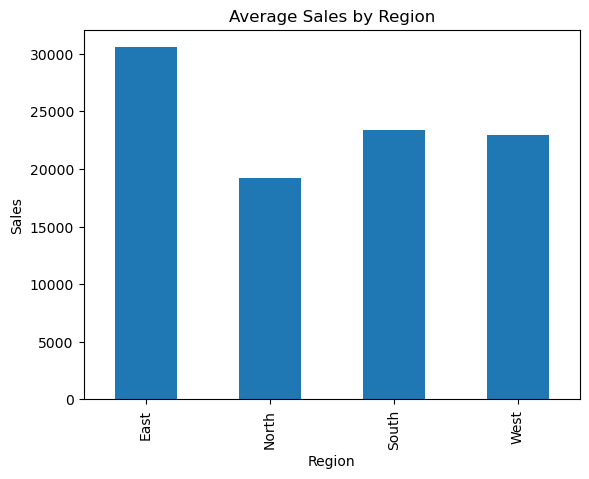

In [12]:
plt.figure()
sales_region.plot(kind='bar')
plt.title('Average Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

In [15]:
#7.profit by product category
product_category = df.groupby('Product_Category')['Profit'].mean()
product_category

Product_Category
Clothing       5911.400000
Electronics    3523.250000
Furniture      3969.565217
Name: Profit, dtype: float64

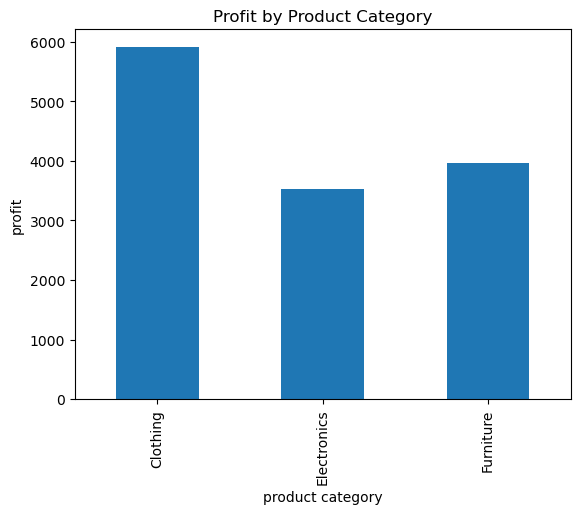

In [14]:
plt.figure()
product_category.plot(kind='bar')
plt.title('Profit by Product Category')
plt.xlabel('product category')
plt.ylabel('profit')
plt.show()

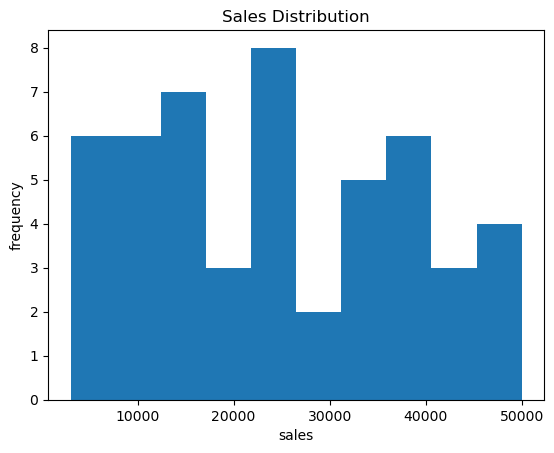

In [16]:
#8.Distriutio of sales
plt.figure()
plt.hist(df['Sales'], bins=10)
plt.title('Sales Distribution')
plt.xlabel('sales')
plt.ylabel('frequency')
plt.show()

In [17]:
#9.correlation analysis
corr = df[['Sales','Quantity','Profit']].corr()
print(corr)

             Sales  Quantity    Profit
Sales     1.000000  0.148182  0.025449
Quantity  0.148182  1.000000 -0.016336
Profit    0.025449 -0.016336  1.000000


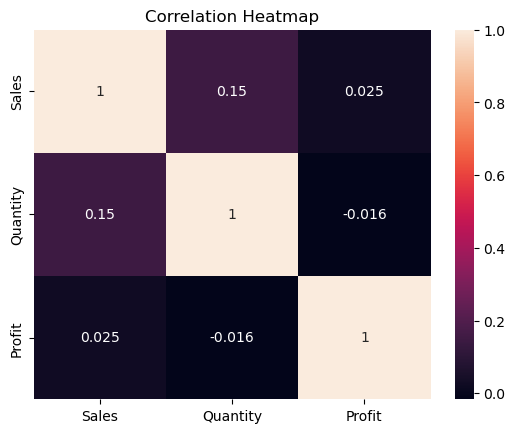

In [18]:
plt.figure()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
df.columns

Index(['Order_ID', 'Order_Date', 'Region', 'Product_Category', 'Sales',
       'Quantity', 'Profit', 'Month', 'profit_margin'],
      dtype='object')

In [20]:
#10.monthly sales trend
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales

Month
1    735424
2    477848
Name: Sales, dtype: int64

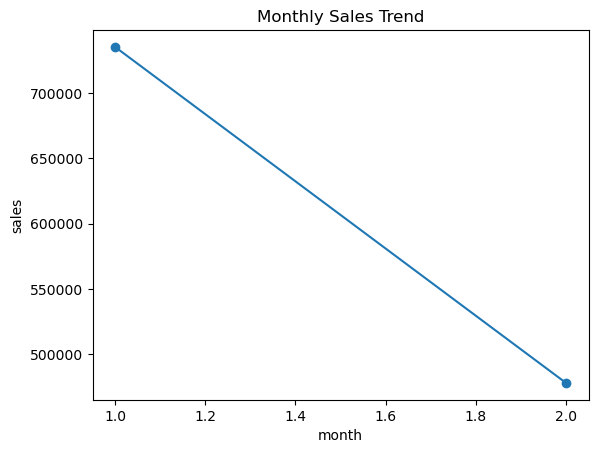

In [25]:
plt.figure()
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('month')
plt.ylabel('sales')
plt.show()

In [26]:
#11.ANOVA Test (Sales across Regions)
from scipy import stats

east = df[df['Region']=='East']['Sales']
west = df[df['Region']=='West']['Sales']
north = df[df['Region']=='North']['Sales']
south = df[df['Region']=='South']['Sales']

f_stats, p_value = stats.f_oneway(east, west, north, south)

print("ANOVA F-Statistic:", f_stats)
print("ANOVA P-Value:", p_value)

ANOVA F-Statistic: 1.3876461750044247
ANOVA P-Value: 0.25847457552272785


In [1]:
# 12. Final Output
print("EDA & Statistical Analysis Completed Successfully")

EDA & Statistical Analysis Completed Successfully
